## 01 . Import packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as prof

## 02 . Import data

In [2]:
data = pd.read_csv('../train.csv')

In [3]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [5]:
randomState = 42
ntree=25

## 03 . Profiling

In [6]:
data_profile = prof.ProfileReport(data)

data_profile.to_file('../data_profile.html')

NameError: name 'prof' is not defined

## 04. Correlation matrix

def correlationForActivity(data_in,activity,path):
    
    0corrmat = data_in.ix[data_in.activity==activity,:-2].corr()
    sns.set_style('whitegrid')
    sns.plt.figure(figsize=(100,100))
    sns.heatmap(corrmat)
    plt.savefig(path)
    
correlationForActivity(data_in = data,
                       activity = 'standing',
                       path='../data/correlationPlot.png')

## 05. Variable variance

In [7]:
dataVar_total = data.ix[:,:-2].var(0).transpose().sort_values(ascending=False)
dataVar_act = data.ix[:,:-2].groupby(data.Activity).var(0).transpose()

C:\Users\salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [9]:
dataVar_total.tail(10)

tGravityAcc-iqr()-X                 0.005378
fBodyGyro-bandsEnergy()-25,48.2     0.005165
fBodyGyro-bandsEnergy()-33,48.1     0.005119
tBodyAcc-mean()-X                   0.004937
fBodyGyro-bandsEnergy()-33,48.2     0.004666
fBodyGyro-bandsEnergy()-33,40.2     0.004287
fBodyGyro-bandsEnergy()-33,40.1     0.004192
fBodyAccJerk-bandsEnergy()-57,64    0.003367
tBodyAcc-mean()-Z                   0.003208
tBodyAcc-mean()-Y                   0.001665
dtype: float64

In [10]:
dataVar_total.head(10)

fBodyAccJerk-entropy()-X         0.565102
fBodyAccJerk-entropy()-Y         0.542504
tBodyAccJerkMag-entropy()        0.528914
fBodyAcc-entropy()-X             0.525717
tGravityAcc-correlation()-X,Z    0.500873
tGravityAcc-correlation()-Y,Z    0.495843
tBodyGyroJerkMag-entropy()       0.495160
tGravityAcc-energy()-X           0.487070
tGravityAcc-correlation()-X,Y    0.485302
fBodyAccMag-entropy()            0.466093
dtype: float64

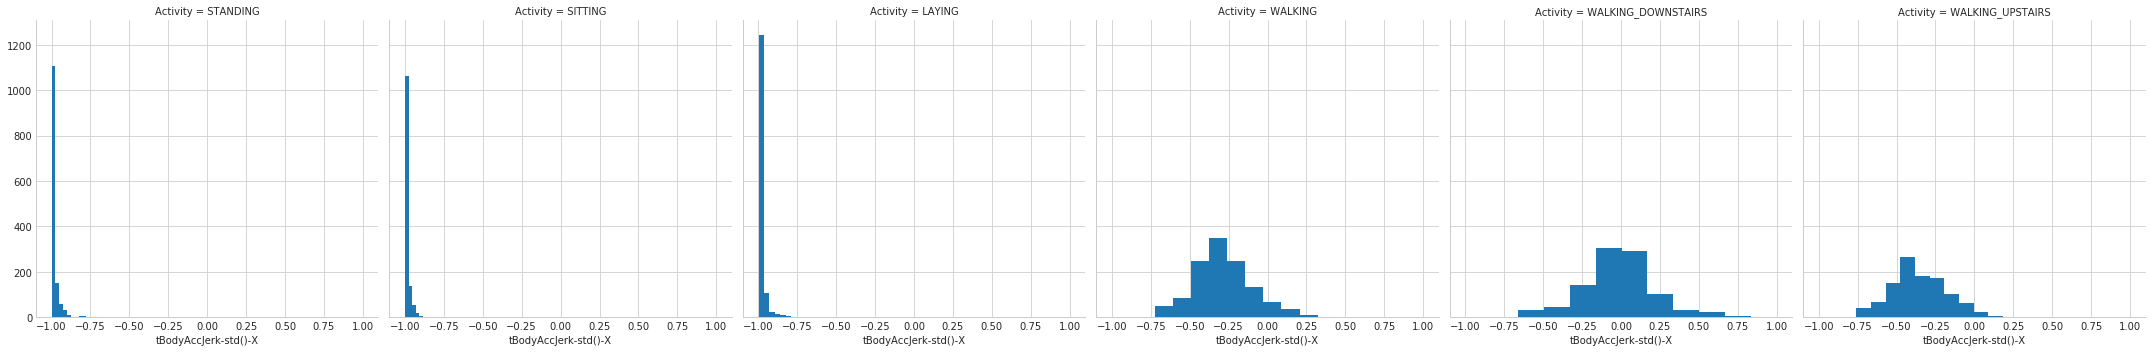

In [12]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
g = sns.FacetGrid(data,col='Activity',size=5)
g.map(plt.hist,'tBodyAccJerk-std()-X')